In [79]:
import os
import shutil
import glob
import numpy as np
import pandas as pd

In [64]:
# resultsはこの関数を実行する前にnew_filesに集めておく
# 分類した元素のフォルダの上のディレクトリで実行するとラベル付けされたarrayを返す
# new_filesの中の各GBfileにresultsとdescriptorをそろえておく

def mk_rslts_dscrp(base):
    basedir = os.getcwd()
    for name in glob.glob('./**/*results.txt', recursive=True):
        category_list = name.split('\\')[1:-1]
#        print(category_list)
        category = '\\'.join(name.split('\\')[:-1])
        print(category)
        os.chdir(os.path.abspath(category))
        results = np.loadtxt('results.txt', unpack = True)
        descriptor = np.loadtxt('descriptor.txt', unpack = True)
        colomn_num = len(results) + len(descriptor) + 3
        os.chdir(basedir)
    final_data = np.full(colomn_num,0)
    for name in glob.glob('./**/*results.txt', recursive=True):
        category_list = name.split('\\')[1:-1]
        print(category_list)
        category = '\\'.join(name.split('\\')[:-1])   
        os.chdir(os.path.abspath(category))
        results = np.loadtxt('results.txt', unpack = False)
        descriptor = np.loadtxt('descriptor.txt', unpack = False)
        data = np.hstack((results,descriptor))
        print(data)
# np.tileを使っているここが肝
        category_list = np.tile(category_list,(len(data),1))
        data = np.hstack((category_list,data))
        final_data = np.vstack((final_data,data))
    #    print(os.getcwd())

        os.chdir(basedir)
    final_data = np.delete(final_data,0,axis = 0)
    return final_data
#     print(final_data)


In [66]:
os.chdir('..')
os.getcwd()

'C:\\Users\\hatayuki\\OneDrive - The University of Tokyo\\now_using\\210909'

In [67]:
os.listdir('.')

['Ag', 'Al', 'Au']

In [68]:
# results,descriptorはこの関数を実行する前にnew_filesに集めておく
# 分類した元素のフォルダの上のディレクトリで実行するとラベル付けされたarrayを返す
# new_filesの中の各GBfileにresultsとdescriptorをそろえておく
def mk_rslts_dscrp():
    firstLoop = True
    for name in glob.glob('./**/*results', recursive=True):
        category_list = name.split('\\')[1:-1]
        print(category_list)
        foldername = '\\'.join(name.split('\\')[:-1])
        results = np.loadtxt(f'{foldername}\\results', unpack = False)
        descriptor = np.loadtxt(f'{foldername}\\descriptor', unpack = False)
        data = np.hstack((results,descriptor))
# np.tile
        category_list = np.tile(category_list,(len(data),1))
        data = np.hstack((category_list,data))
        
        if firstLoop:
            final_data = data
            firstLoop = False
        else:
            final_data = np.vstack((final_data,data))
    return final_data


In [69]:
data = mk_rslts_dscrp()

['Ag', '100', '001']
['Ag', '100', '002']
['Ag', '100', '003']
['Ag', '100', '004']
['Ag', '100', '005']
['Ag', '100', '006']
['Ag', '100', '007']
['Ag', '100', '008']
['Ag', '100', '009']
['Ag', '100', '010']
['Ag', '100', '011']
['Ag', '100', '012']
['Ag', '100', '013']
['Ag', '100', '014']
['Ag', '100', '015']
['Ag', '100', '016']
['Ag', '100', '017']
['Ag', '100', '018']
['Ag', '100', '019']
['Ag', '100', '020']
['Ag', '100', '021']
['Ag', '100', '022']
['Ag', '100', '023']
['Ag', '100', '024']
['Ag', '100', '025']
['Ag', '100', '026']
['Ag', '100', '027']
['Ag', '100', '028']
['Ag', '110', '029']
['Ag', '110', '030']
['Ag', '110', '031']
['Ag', '110', '032']
['Ag', '110', '033']
['Ag', '110', '034']
['Ag', '110', '035']
['Ag', '110', '036']
['Ag', '110', '037']
['Ag', '110', '038']
['Ag', '110', '039']
['Ag', '110', '040']
['Ag', '110', '041']
['Ag', '110', '042']
['Ag', '110', '043']
['Ag', '110', '044']
['Ag', '110', '045']
['Ag', '110', '046']
['Ag', '110', '047']
['Ag', '110',

In [99]:
df_data = pd.DataFrame(data)
df_data.to_csv('df_data.csv')

In [131]:
df_data = pd.read_csv('df_data.csv',header = 0)
df_data = df_data.rename(columns={df_data.columns[0]: 'index'})
df_data = df_data.rename(columns={df_data.columns[7]: 'energy'})
df_data = df_data.set_index(['element','axis','gbindex','index'])
df_data.head()

3             4         5      energy         7  \
element axis gbindex index                                                    
Ag      100  1       0      0  0.000000e+00  0.000000  932.215040  0.586233   
                     1      0  4.650000e-17  0.195148  933.064724  0.586165   
                     2      0  9.300000e-17  0.390296  935.633536  0.586739   
                     3      0  1.400000e-16  0.585443  939.860373  0.581477   
                     4      0  1.860000e-16  0.780591  872.995523  0.433674   

                            8  9        10        11   12   13        14  \
element axis gbindex index                                                 
Ag      100  1       0      1  1  2.338264  2.880000   80  680  1.931963   
                     1      1  2  2.314516  2.844619  120  692  2.197623   
                     2      1  3  2.368667  2.830298  200  744  2.425024   
                     3      1  4  2.347579  2.832127  200  740  2.408533   
                     4      1  5  2.336659  2.839053  200  742  2.405609   

                                  15        16   17  
element axis gbindex index                           
Ag      100  1       0      2.880000  1.287975  240  
                     1      2.898206  1.302675  240  
                     2      2.880000  1.345812  360  
                     3      2.880000  1.414788  360  
                     4      2.880000  1.506055  360

In [109]:
df_cnid = pd.read_csv('concat.csv', header = 0)
df_cnid = df_cnid.set_index(['element','axis','gbindex'])


                                2          3         4             5  \
element axis gbindex                                                   
Cr      100  1            <0 1 2>  53.130102  2.880978 -9.930000e-17   
             2            <0 3 1>  36.869898  2.880978 -1.400000e-16   
             3            <0 2 3>  67.380135 -2.880978  2.710000e-17   
             4           <0 -1 5>  22.619865  2.880978  1.150000e-16   
             5            <0 4 1>  28.072487  2.880978  7.120000e-17   
...                           ...        ...       ...           ...   
Pt      111  98       <-8 -11 19>  49.582562 -6.785087  9.300000e-15   
             99         <-1 -5 6>  17.896551  2.261696  1.190000e-16   
             100       <-7 -4 11>  42.103449  6.785087  1.130000e-15   
             101       <-8 -3 11>  30.590689  6.785087 -5.440000e-16   
             102      <-5 -14 19>  29.409311  6.785087 -4.880000e-15   

                                 6          7         8        

In [117]:
groupby = df_cnid.groupby('element')
df_cnid_Al = groupby.get_group('Al')
df_cnid_Ag = groupby.get_group('Ag')
df_cnid_Au = groupby.get_group('Au')
df_test = pd.concat([df_cnid_Al,df_cnid_Ag])
df_test = pd.concat([df_test,df_cnid_Au])

In [132]:
def df_stack(df_multi,df_multi2):
    column_list = df_multi2.columns.tolist()
    for i in df_multi2.index.tolist():
    #    A, B = i
        for column_name in column_list:
            n = df_multi2.index.tolist().index(i)
            df_multi.loc[tuple(i),column_name] = df_multi2[column_name].tolist()[n]
    return df_multi

In [133]:
df_dash = df_stack(df_data,df_test)

In [135]:
df_dash = df_dash.rename(columns={df_data.columns[0]: 'misorientation'})
df_dash.head()

misorientation         4             5  \
element axis gbindex index                                           
Ag      100  1       0           36.869898  4.072935 -4.320000e-16   
                     1           36.869898  4.072935 -4.320000e-16   
                     2           36.869898  4.072935 -4.320000e-16   
                     3           36.869898  4.072935 -4.320000e-16   
                     4           36.869898  4.072935 -4.320000e-16   

                                energy         7         8         9  \
element axis gbindex index                                             
Ag      100  1       0      932.215040  6.439876  4.072935  6.439876   
                     1      933.064724  6.439876  4.072935  6.439876   
                     2      935.633536  6.439876  4.072935  6.439876   
                     3      939.860373  6.439876  4.072935  6.439876   
                     4      872.995523  6.439876  4.072935  6.439876   

                                   10   11  12  13        14        15  \
element axis gbindex index                                               
Ag      100  1       0      26.229196  5.0   1   1  1.931963  2.880000   
                     1      26.229196  5.0   1   1  2.197623  2.898206   
                     2      26.229196  5.0   1   1  2.425024  2.880000   
                     3      26.229196  5.0   1   1  2.408533  2.880000   
                     4      26.229196  5.0   1   1  2.405609  2.880000   

                                  16   17         2             6  
element axis gbindex index                                         
Ag      100  1       0      1.287975  240  <0 -1 3>  1.540000e-15  
                     1      1.302675  240  <0 -1 3>  1.540000e-15  
                     2      1.345812  360  <0 -1 3>  1.540000e-15  
                     3      1.414788  360  <0 -1 3>  1.540000e-15  
                     4      1.506055  360  <0 -1 3>  1.540000e-15

28


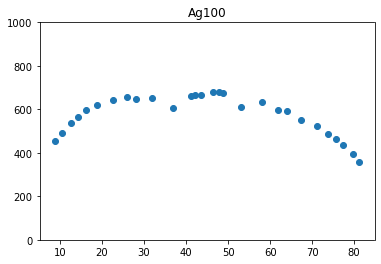

38


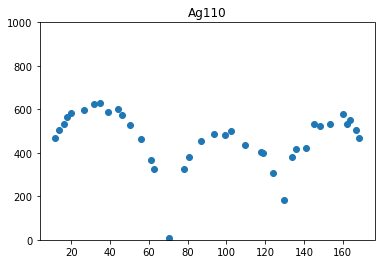

36


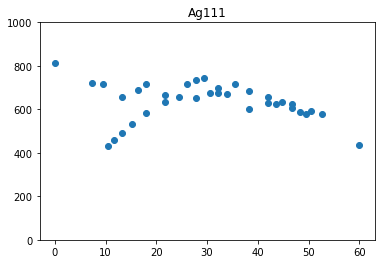

28


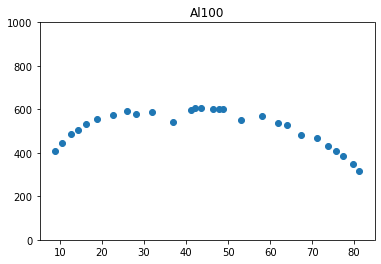

38


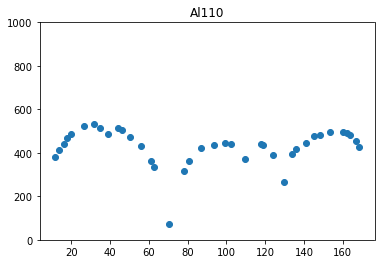

36


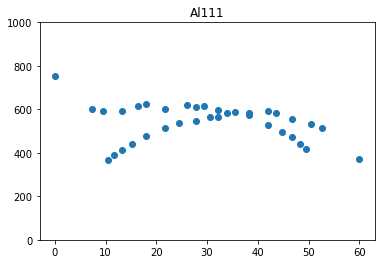

28


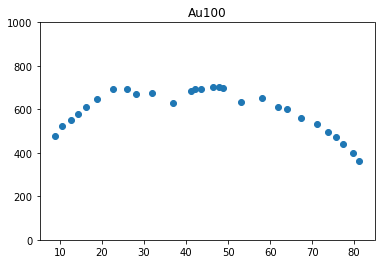

38


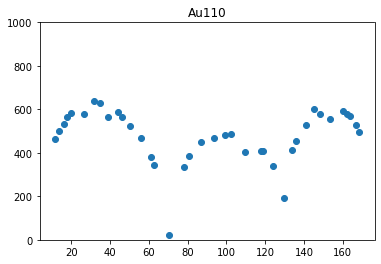

36


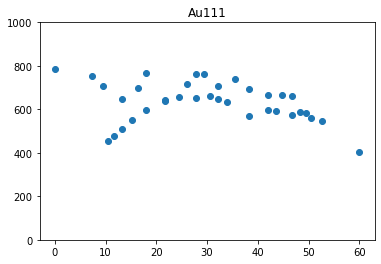

In [147]:

def make_gbe_graph(df_dash):
    for name_i, group_i in df_dash.groupby('element'):
        for name_j, group_j in group_i.groupby('axis'):
            emin_list = []
            misorientation_list = []
            for name_k, group_k in group_j.groupby('gbindex'):
                emin_list.append(group_k['energy'].values.min())
                misorientation_list.append(group_k['misorientation'].unique())
            print(len(misorientation_list))
            plt.scatter(misorientation_list,emin_list)
            plt.title(f'{name_i}{name_j}')
            plt.savefig(f'{name_i}{name_j}.pdf')
            plt.ylim(0,1000)
            plt.show()
make_gbe_graph(df_dash)

In [136]:
import matplotlib.pyplot as plt

In [83]:
os.getcwd()

'C:\\Users\\hatayuki\\OneDrive - The University of Tokyo\\now_using\\210909'

In [63]:
os.chdir(basedir)

In [41]:
#1～gbnumまでのindexを作成する関数
gbnum = 12
vector = np.arange(1,gbnum+1) 
vector = np.array([vector], dtype = int).T
vector = np.array(vector, dtype = str)
for i in range(len(vector)):
    vector[i][0] = vector[i][0].zfill(3)
print(vector)

[['001']
 ['002']
 ['003']
 ['004']
 ['005']
 ['006']
 ['007']
 ['008']
 ['009']
 ['010']
 ['011']
 ['012']]


In [30]:
vector

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012'], dtype='<U11')

In [21]:
vector[0].zfill(3)

'001'